In [ ]:
%%capture
!wget -O kp_train.csv https://www.dropbox.com/scl/fi/mzvuxvjheh6sjzzu8nio9/kp_train.csv?rlkey=dm2k7kbgwhs2bebj3lejzg2ag&dl=0
!wget -O kp_valid.csv https://www.dropbox.com/scl/fi/4g75r45ntfxsv2evbpr9u/kp_valid.csv?rlkey=631t34qfnq38rn92akc5h10pi&dl=0

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings(action="ignore")
import tensorflow as tf

In [ ]:
df_train = pd.read_csv("kp_train.csv", sep='|')
df_val = pd.read_csv("kp_valid.csv", sep='|')

In [ ]:
df_train.head(10)

,review,sentiment
0,Сегодня в очередной раз пересмотрел один из мо...,pos
1,На фильм попал случайно. Шел просто скоротать ...,pos
2,Накануне Дня космонавтики на российские экраны...,neu
3,Моя любимая комедия. На порядок выше голливудс...,pos
4,Астронавт Чак Бейкер прилетает на неизведанную...,pos
5,Смотрел этот фильм еще когда он шел в кинотеат...,neu
6,"Недалекое будущее, 1999 год... Довольно странн...",pos
7,В мире независимого кинематографа фильм станов...,neg
8,Перед описанием впечатлений от самого фильма о...,pos
9,"Белый, нейтральный цвет этой рецензии говорит ...",neu


In [ ]:
df_val.head(10)

,review,sentiment
0,Странный фильм. Такие фильмы умеют снимать тол...,pos
1,Фильм великолепен! Но мы привыкли придерживать...,pos
2,Фильм снят по мотивам бестселлера датской писа...,neu
3,"Шучу - феноменальный сериал, он демонстрирует ...",pos
4,Благодаря потрясающей оригинальной музыке Найм...,pos
5,Попытка разобраться в том что из себе представ...,neg
6,Вот чего уж не ожидали от «нашего голливудског...,neg
7,"У меня есть длинный список фильмов, которые ст...",pos
8,Вот уже прошло две недели после просмотра мной...,neu
9,Друзья отговаривали смотреть 'Жестокие игры-2'...,neg


In [ ]:
df_train.isna().sum()

review       0
sentiment    0
dtype: int64

In [ ]:
df_train.shape

(57000, 2)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57000 entries, 0 to 56999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     57000 non-null  object
 1   sentiment  57000 non-null  object
dtypes: object(2)
memory usage: 890.8+ KB


In [ ]:
df = pd.concat([df_train, df_val])
le = LabelEncoder()
df["sentiment"] = le.fit_transform(df["sentiment"])
df.head()

,review,sentiment
0,Сегодня в очередной раз пересмотрел один из мо...,2
1,На фильм попал случайно. Шел просто скоротать ...,2
2,Накануне Дня космонавтики на российские экраны...,1
3,Моя любимая комедия. На порядок выше голливудс...,2
4,Астронавт Чак Бейкер прилетает на неизведанную...,2


In [ ]:
df.sentiment.unique()

array([2, 1, 0])

In [ ]:
# le = LabelEncoder()
# df_val["sentiment"] = le.fit_transform(df_val["sentiment"])
# df_val.head()

In [ ]:
# df_val.sentiment.unique()

In [ ]:
def standardize_text(df, content_field):
    df[content_field] = df[content_field].str.replace(r"http\S+", "")
    df[content_field] = df[content_field].str.replace(r"http", "")
    df[content_field] = df[content_field].str.replace(r"@\S+", "")
    df[content_field] = df[content_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    df[content_field] = df[content_field].str.replace(r"@", "at")
    df[content_field] = df[content_field].str.lower()
    return df

In [ ]:
standardize_text(df,"review")

,review,sentiment
0,сегодня в очередной раз пересмотрел один из мо...,2
1,на фильм попал случайно. шел просто скоротать ...,2
2,накануне дня космонавтики на российские экраны...,1
3,моя любимая комедия. на порядок выше голливудс...,2
4,астронавт чак бейкер прилетает на неизведанную...,2
...,...,...
1495,"когда создателям фильмов не хватает таланта, э...",1
1496,"может, в воспитательном плане мультфильм в нек...",2
1497,"алекс кросс - чувак, что надо. в качестве дете...",1
1498,сразу скажу - мультфильм совершенно дурацкий. ...,2


In [ ]:
# standardize_text(df_val,"review")

In [ ]:
import re
import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df = df.reset_index(drop=True)

In [ ]:
lemmatizer=WordNetLemmatizer()
corpus = []
for i in range(0,len(df)):
    review = re.sub('[^a-zA-Zа-яА-Я0-9]', ' ', str(df['review'][i]))
    review = review.split()
    review=[word for word in review if not word in set(stopwords.words('russian'))]
    review = [lemmatizer.lemmatize(word) for word in review]
    review=' '.join(review)
    corpus.append(review)

In [ ]:
df_train_len=len(df_train)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1, 3))
X = tfidf.fit_transform(corpus)
y = df["sentiment"]

In [ ]:
X_train = X[:df_train_len]
X_valid = X[df_train_len:]
y_train = y[:df_train_len]
y_valid = y[df_train_len:]

In [ ]:
from sklearn.svm import LinearSVC
classifier = LinearSVC()
classifier.fit(X_train, y_train)

LinearSVC()

In [ ]:
y_pred = classifier.predict(X_valid)
y_pred[:5]

array([2, 2, 2, 2, 2])

              precision    recall  f1-score   support

           0       0.78      0.69      0.73       569
           1       0.45      0.56      0.50       397
           2       0.77      0.72      0.74       534

    accuracy                           0.67      1500
   macro avg       0.67      0.66      0.66      1500
weighted avg       0.69      0.67      0.67      1500

Accuracy Score of SVC: 66.66666666666666 %


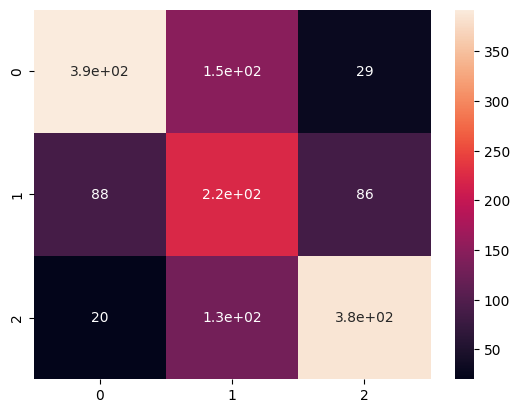

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
acc = accuracy_score(y_pred, y_valid)
report = classification_report(y_pred, y_valid)
cm = confusion_matrix(y_pred,y_valid)
sns.heatmap(cm, annot=True)
print(report)
print("Accuracy Score of SVC:", acc*100,"%")